In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [37]:
df=pd.read_csv(r'C:\Users\pnaik27\Anaconda\Algorithm\Linear Regression\DataSet\car data.csv')

In [38]:
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


<AxesSubplot:>

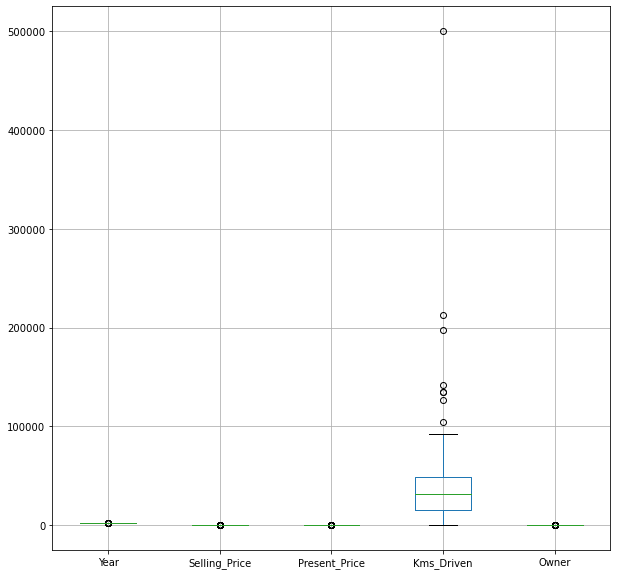

In [40]:
df.boxplot(figsize=(10,10))

In [41]:
df[df['Kms_Driven']>=100000]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
37,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0
50,fortuner,2012,14.90,30.61,104707,Diesel,Dealer,Automatic,0
53,fortuner,2013,16.00,30.61,135000,Diesel,Individual,Automatic,0
77,corolla,2004,1.50,12.35,135154,Petrol,Dealer,Automatic,0
84,innova,2005,3.49,13.46,197176,Diesel,Dealer,Manual,0
85,camry,2006,2.50,23.73,142000,Petrol,Individual,Automatic,3
179,Honda Karizma,2010,0.31,1.05,213000,Petrol,Individual,Manual,0
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0


In [42]:
df.iloc[[179,196]]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
179,Honda Karizma,2010,0.31,1.05,213000,Petrol,Individual,Manual,0
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0


In [43]:
df.drop(index=[179,196],inplace=True)

In [44]:
df.iloc[[179,196]]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
180,Hero Honda Passion Pro,2012,0.30,0.51,60000,Petrol,Individual,Manual,0
198,Bajaj Discover 125,2011,0.15,0.57,35000,Petrol,Individual,Manual,1


<AxesSubplot:>

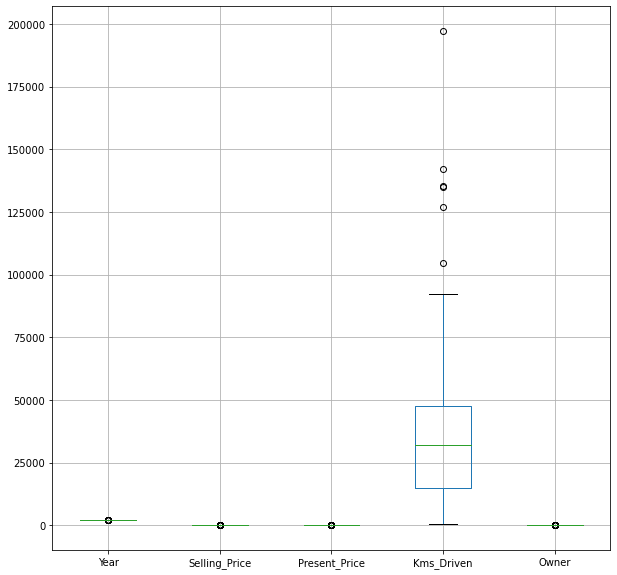

In [45]:
df.boxplot(figsize=(10,10))

In [46]:
df['Log_Kms_Driven']=np.log10(df['Kms_Driven'])

<AxesSubplot:>

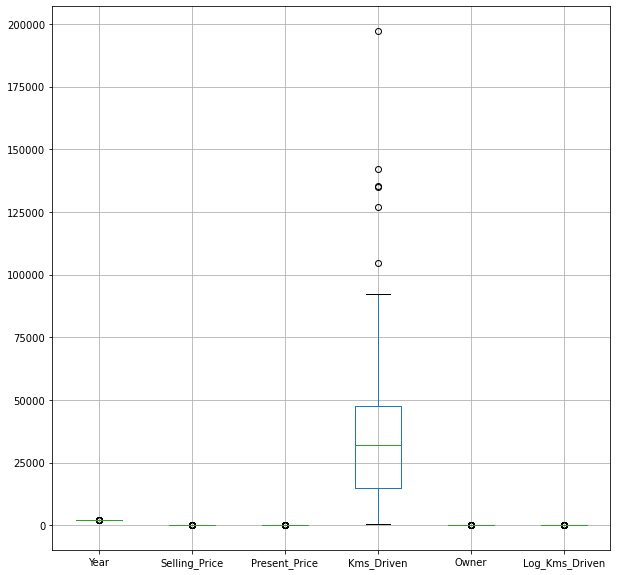

In [47]:
df.boxplot(figsize=(10,10))

In [48]:
df['Age']=2020-df['Year']

In [49]:
var=['Owner','Fuel_Type','Transmission']
for i in var:
    print(i,'\n',df[i].value_counts(),'\n')

Owner 
 0    288
1     10
3      1
Name: Owner, dtype: int64 

Fuel_Type 
 Petrol    237
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64 

Transmission 
 Manual       260
Automatic     39
Name: Transmission, dtype: int64 



In [50]:
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Log_Kms_Driven,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,4.431364,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,4.633468,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3.838849,3


In [51]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Log_Kms_Driven',
       'Age'],
      dtype='object')

In [52]:
Final_df=df[['Selling_Price', 'Present_Price','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Log_Kms_Driven','Age']]
Final_df.head(3)

,Selling_Price,Present_Price,Fuel_Type,Seller_Type,Transmission,Owner,Log_Kms_Driven,Age
0,3.35,5.59,Petrol,Dealer,Manual,0,4.431364,6
1,4.75,9.54,Diesel,Dealer,Manual,0,4.633468,7
2,7.25,9.85,Petrol,Dealer,Manual,0,3.838849,3


In [53]:
Final_df=pd.get_dummies(Final_df,drop_first=True)

In [54]:
Final_df.head(3)

,Selling_Price,Present_Price,Owner,Log_Kms_Driven,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,0,4.431364,6,0,1,0,1
1,4.75,9.54,0,4.633468,7,1,0,0,1
2,7.25,9.85,0,3.838849,3,0,1,0,1


In [55]:
Final_df['Owner'].value_counts()

0    288
1     10
3      1
Name: Owner, dtype: int64

In [57]:
scaler=StandardScaler()
var=['Present_Price','Log_Kms_Driven','Age']
Final_df[var]=scaler.fit_transform(Final_df[var])
Final_df.head(3)

,Selling_Price,Present_Price,Owner,Log_Kms_Driven,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,-0.241224,0,0.102931,-0.118854,0,1,0,1
1,4.75,0.215936,0,0.571883,0.229552,1,0,0,1
2,7.25,0.251814,0,-1.271906,-1.164072,0,1,0,1


In [61]:
y=Final_df.iloc[:,0]
x=Final_df.iloc[:,1:]

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [64]:
reg_model=LinearRegression()
reg_model.fit(x_train,y_train)

LinearRegression()

In [65]:
reg_model.score(x_train,y_train)

0.8764015906934944

In [66]:
reg_model.score(x_test,y_test)

0.8876410965789443

In [68]:
y_pred=reg_model.predict(x_test)

In [74]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAE: 0.8849978021977988
MSE: 3.9544237722813156
RMSE: 1.9885733007061408

MAE: 1.221563358502445
MSE: 3.333331325237501
RMSE: 1.8257413084107785


In [97]:
from sklearn.metrics import accuracy_score
metrics.accuracy_score(y_test,y_pred)

ValueError: continuous is not supported

In [75]:
import statsmodels.api as sm
model_1=sm.OLS(endog=y,exog=x).fit()
print(model_1.summary())

                                 OLS Regression Results                                
Dep. Variable:          Selling_Price   R-squared (uncentered):                   0.933
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              503.4
Date:                Fri, 11 Dec 2020   Prob (F-statistic):                   1.57e-165
Time:                        11:24:25   Log-Likelihood:                         -599.12
No. Observations:                 299   AIC:                                      1214.
Df Residuals:                     291   BIC:                                      1244.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

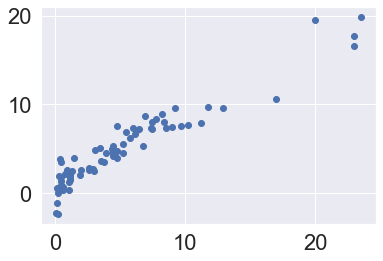

In [85]:
plt.scatter(y_test,predictions)

Text(0, 0.5, 'Feature')

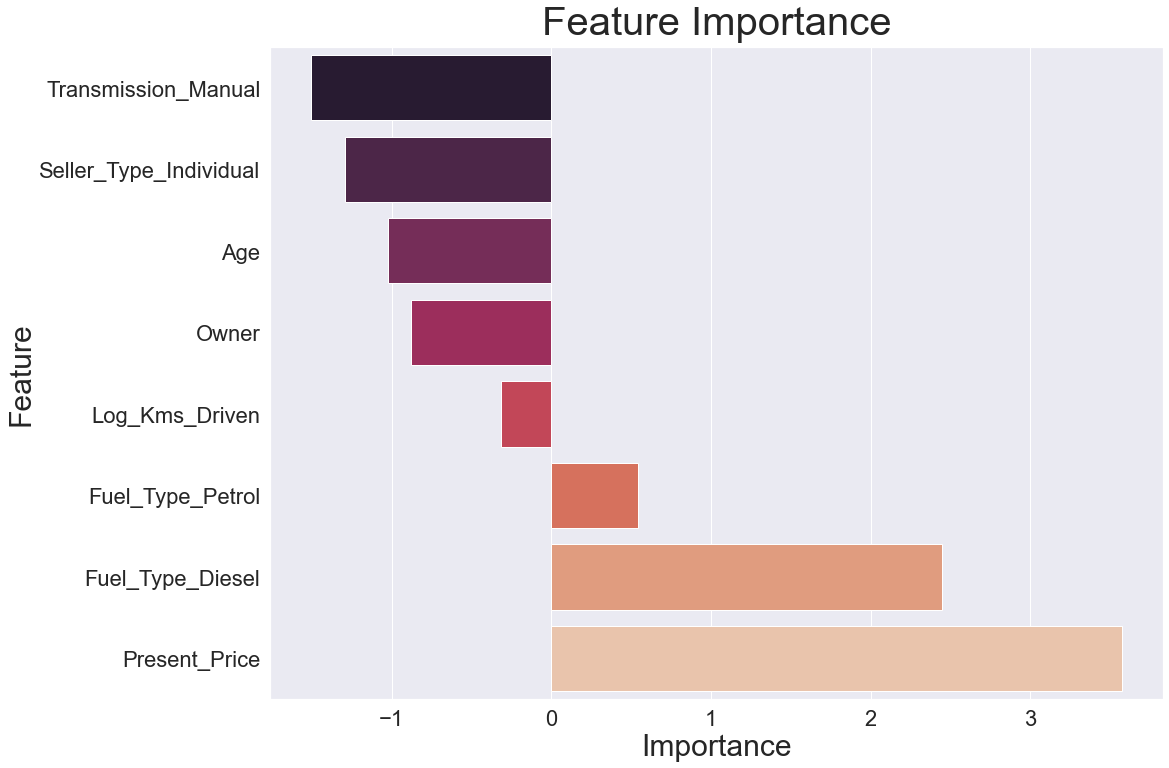

In [102]:
fi = pd.DataFrame({
    'feature': x_train.columns,
    'importance': reg_model.coef_
})
fi.sort_values('importance', ascending=True, inplace=True)
#sns.set_style('ticks')
sns.set(font_scale = 2)
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(16, 12)
sns.barplot(x='importance', y='feature', data=fi[-15:], orient='h', palette = 'rocket', saturation=0.7)  
ax.set_title("Feature Importance", fontsize=40, y=1.01)
ax.set_xlabel('Importance', fontsize = 30)
ax.set_ylabel('Feature', fontsize = 30)

In [103]:
reg_model.coef_

array([ 3.5750802 , -0.87647384, -0.3160336 , -1.02308382,  2.44735534,
        0.54375071, -1.2937805 , -1.5071706 ])

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = x

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = x

ValueError: Wrong number of items passed 8, placement implies 1